 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b><br>
Здравствуй Дмитрий!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий Студента 🙇‍♂️</h2>
    
Спасибо большое за ревью Ваши замечания, они были очень полезны
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ ТИМЛИДА 3</b><br>Привет, Дмитрий! спасибо) 

# Финальный проект: Промышленность

## Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Нам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики.</p>
</div>

## Импрортируем необходимые библиотеки

In [1]:
import sys
!{sys.executable} -m pip install catboost
!{sys.executable} -m pip install lightgbm


from catboost import CatBoostRegressor
import lightgbm as lgb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_predict,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
RANDOM_STATE = 2062023

## Первичный анализ данных

### Загрузка данных

#### Метод yandex_read_try

In [3]:
def yandex_read_try(file):
    try:
        data = pd.read_csv('/datasets/' + file)
    except:
        data = pd.read_csv('https://code.s3.yandex.net/datasets/' + file)
    return data

In [4]:
# Читаем информацию об электродах

data_arc = yandex_read_try('data_arc_new.csv')

In [5]:
# Читаем информацию о подаче сыпучих материалов (объём)

data_bulk = yandex_read_try('data_bulk_new.csv')

In [6]:
# Читаем информацию о подаче сыпучих материалов (время)

data_bulk_time = yandex_read_try('data_bulk_time_new.csv')

In [7]:
# Читаем информацию о продувке сплава газом

data_gas = yandex_read_try('data_gas_new.csv')

In [8]:
# Читаем информацию о результатах измерения температуры

data_temp = yandex_read_try('data_temp_new.csv')

In [9]:
# Читаем информацию о проволочных материалах (объём)

data_wire = yandex_read_try('data_wire_new.csv')

In [10]:
# Читаем информацию о проволочных материалах (время).

data_wire_time = yandex_read_try('data_wire_time_new.csv')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>Как говорится, данные на базе)

### Предварительный анализ информации об электродах

In [11]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [12]:
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [13]:
data_arc.isna().sum()

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

In [14]:
data_arc.head(5)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


Лучше бы привести названия к классическому змеиному регистру, чтобы легче с ними было работать

In [15]:
data_arc.columns

Index(['key', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная мощность', 'Реактивная мощность'],
      dtype='object')

In [16]:
data_arc.columns = ['key', 'date_start_heat', 'date_end_heat',
       'active_power', 'reactive_power']

In [17]:
data_arc.columns

Index(['key', 'date_start_heat', 'date_end_heat', 'active_power',
       'reactive_power'],
      dtype='object')

Дальше хотелось бы привести даты к соответствующему им типу, чтобы легче было с ними работать

In [18]:
data_arc['date_start_heat'] = pd.to_datetime(data_arc['date_start_heat'], format='%Y-%m-%d %H:%M:%S')

In [19]:
data_arc['date_start_heat'].head()

0   2019-05-03 11:02:14
1   2019-05-03 11:07:28
2   2019-05-03 11:11:44
3   2019-05-03 11:18:14
4   2019-05-03 11:26:09
Name: date_start_heat, dtype: datetime64[ns]

In [20]:
data_arc['date_end_heat'] = pd.to_datetime(data_arc['date_end_heat'], format='%Y-%m-%d %H:%M:%S')

С предварительной обработкой закончили, дальше хотелось бы рассмотреть как данные представлены в графическом виде

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>ОК.

#### Метод sns_hist_plot

In [21]:
def sns_hist_plot(data, title, xlabel, bins=15, kde=True):
    plt.figure(figsize=(15,6))
    ax = sns.histplot(data, stat='density', kde=kde, bins=bins).set(title=title, xlabel=xlabel, ylabel='Частота')
    plt.show()

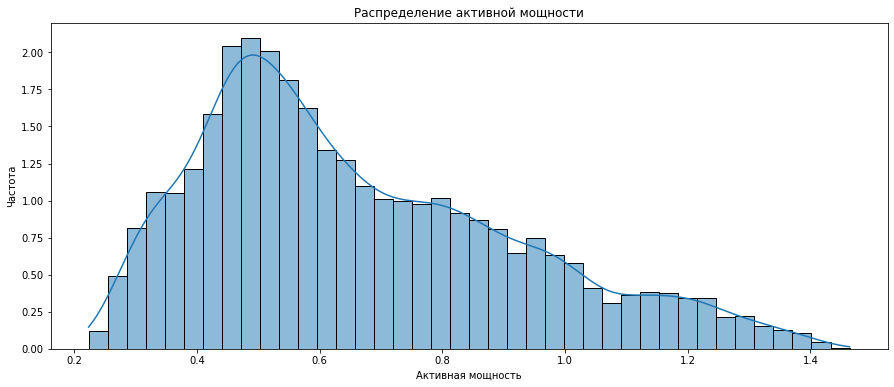

In [22]:
sns_hist_plot(data_arc['active_power'], 'Распределение активной мощности', 'Активная мощность', 40 )

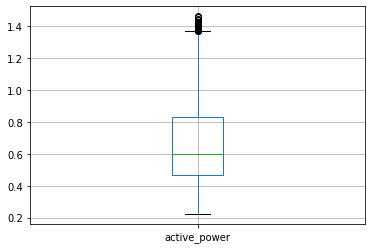

In [23]:
ax = data_arc.boxplot('active_power')

Гистограмма активной мощности не особо похожа на гистограмму гауссовского распределения. На нашем графике можно выделить несколько "пиков": около 0.5, 0.8, 1.0 и 1.2 -  как будто само распределение состоит из нескольких гауссовского. Скорее всего такое распределение связано с различными этапами

Есть значения выходящие за пределены, но эти значения не выглядят аномальными.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>понял, хорошо.

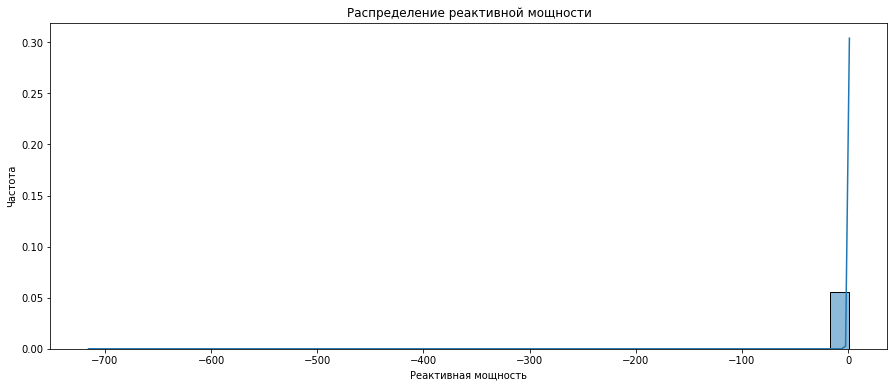

In [24]:
sns_hist_plot(data_arc['reactive_power'], 'Распределение реактивной мощности', 'Реактивная мощность', 40 )

Похоже в нашем распределении есть сильный не естественный выброс.

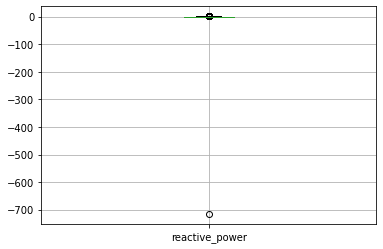

In [25]:
ax = data_arc.boxplot('reactive_power')

In [26]:
data_arc.query('reactive_power < 0')

,key,date_start_heat,date_end_heat,active_power,reactive_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


Рассмотрим все этапы для данного ковша

In [27]:
data_arc.query('key == 2116')

,key,date_start_heat,date_end_heat,active_power,reactive_power
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


Их получилось четыре, лучше быдет если отбросить их всех

In [28]:
data_arc.drop(index=data_arc.query('key == 2116').index, inplace=True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>согласен.

In [29]:
data_arc.query('reactive_power < 0')

,key,date_start_heat,date_end_heat,active_power,reactive_power


Избавились от аномалий

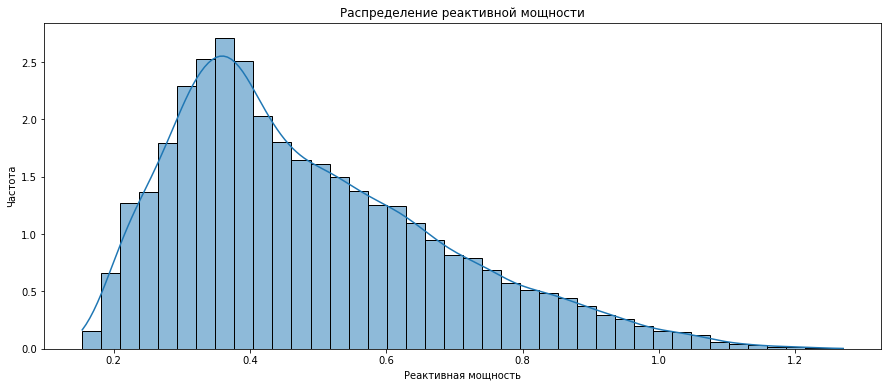

In [30]:
sns_hist_plot(data_arc['reactive_power'], 'Распределение реактивной мощности', 'Реактивная мощность', 40 )

Теперь гистограмма больше похожа на гауссовское распределение смещенное вправо.

Дальше проанализируем время, которое требуется для нагрева.

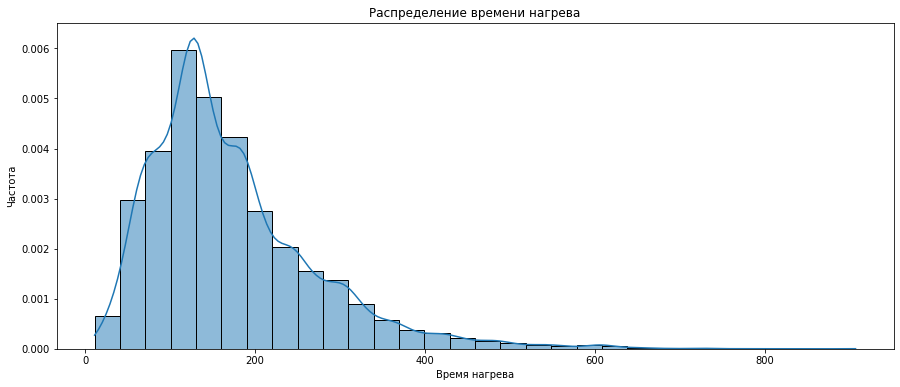

In [31]:
sns_hist_plot(
    (data_arc['date_end_heat'] - data_arc['date_start_heat']) / pd.Timedelta(seconds=1),
    'Распределение времени нагрева',
    'Время нагрева',
     30 )

Гистограмма распределения времени нагрева тоже не особо похожа на гауссовское распределение

In [32]:
data_arc.groupby('key')['active_power'].count().describe()

count    3213.000000
mean        4.628696
std         1.608860
min         1.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: active_power, dtype: float64

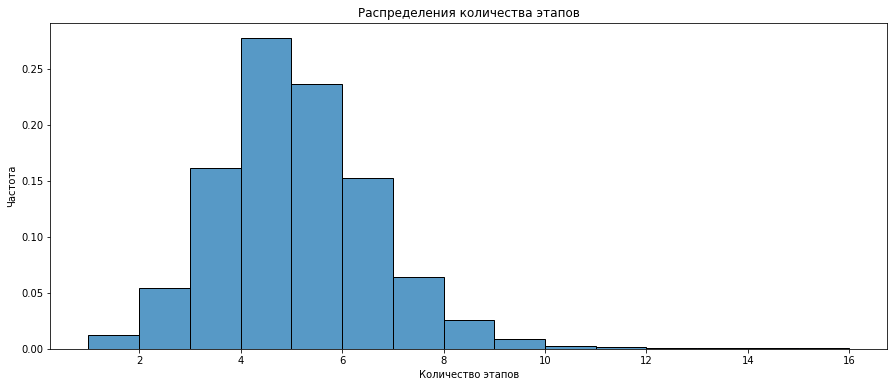

In [33]:
sns_hist_plot(
    data_arc.groupby('key')['active_power'].count(),
    'Распределения количества этапов',
    'Количество этапов',
    kde=False
)

Гистограмма количества этапов имеет гауссовский вид

**Заключение по предварительному анализу информации по электродам:**

- Пропусков не было обнаружено
- Распределение времени нагрева имеет гауссовский вид
- Распределения мощности нагрева не совсем соответствует гауссовскому виду, скорее всего это связано с тем, что мощность зависит от этапа
- Была выявлена аномалии у значений реактивой мощности
- В среднем на каждую партию приходится по четыре этапа
- Гистограмма количества этапов имеет гауссовский вид

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>принято

### Предварительный анализ информации о подаче сыпучих материалов 


In [34]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [35]:
data_bulk.key.duplicated().sum()

0

In [36]:
data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [37]:
data_bulk = data_bulk.rename(columns=lambda x: re.sub(' ','_',x)).rename(columns=lambda x: x.lower())

In [38]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


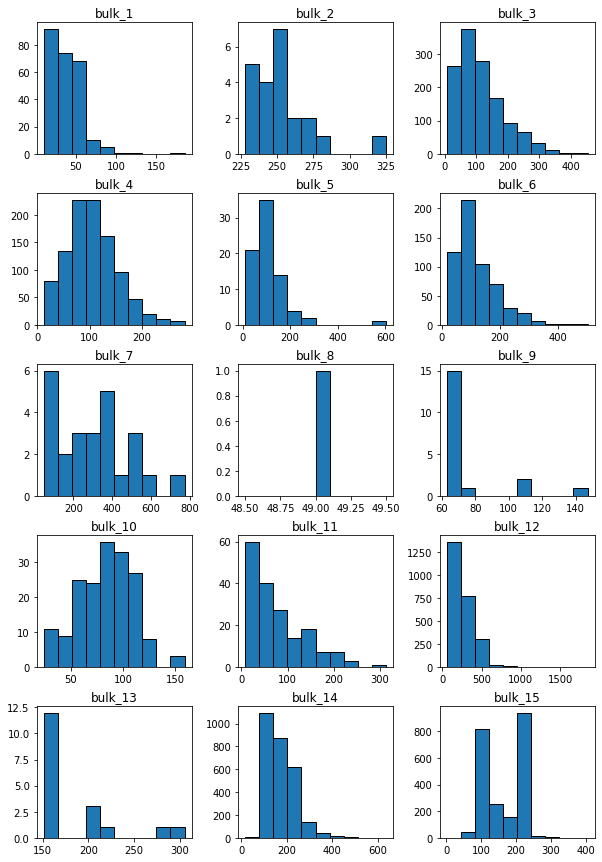

In [39]:
#define format for subplots
fig, axis = plt.subplots(5, 3, figsize=(10,15))

#create histogram for each column in DataFrame
ax = data_bulk.drop(columns=['key']).hist(ax=axis, edgecolor='black', grid=False)

**Заключение по предварительному анализу информации по подаче сыпучих материалов:**

- Множество пропусков:

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>с этим - также понятно.

### Предварительный анализ информации о подаче сыпучих материалов (время)


In [40]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [41]:
data_bulk_time.key.duplicated().sum()

0

In [42]:
data_bulk_time.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

In [43]:
data_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [44]:
data_bulk_time = data_bulk_time.rename(columns=lambda x: re.sub(' ','_',x)).rename(columns=lambda x: x.lower())

In [45]:
for i in range(1,16):
    data_bulk_time['bulk_'+str(i)] =pd.to_datetime(data_bulk_time['bulk_'+str(i)], format='%Y-%m-%d %H:%M:%S')

In [46]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


**Заключение по предварительному анализу информации по подаче сыпучих материалов:**

- Множество пропусков:

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>)

### Предварительный анализ информации о продувке сплава газом


In [47]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [48]:
data_gas.key.duplicated().sum()

0

In [49]:
data_gas.isna().sum()

key      0
Газ 1    0
dtype: int64

In [50]:
data_gas.describe().T

,count,mean,std,min,25%,50%,75%,max
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000
Газ 1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504


In [51]:
data_gas.columns = ['key', 'gas']

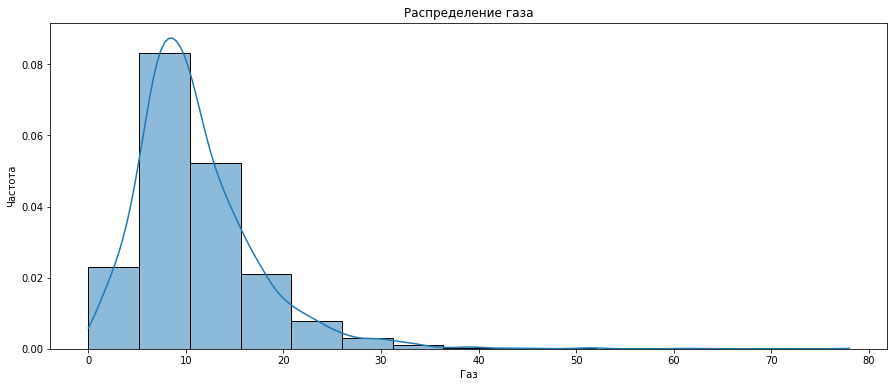

In [52]:
sns_hist_plot(data_gas['gas'], 'Распределение газа', 'Газ' )

Гистограмма распределения газа напоминает гауссовский вид с отклонением вправо.

**Заключение по предварительному анализу информации по подаче сыпучих материалов:**

- Отсутсвие пропусков:
- Гистограмма распределения газа напоминает гауссовский вид с отклонением вправо.

### Предварительный анализ информации о результатах измерения температуры


In [53]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [54]:
data_temp.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

In [55]:
data_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
key,18092.0,1616.460977,934.641385,1.0,807.75,1618.0,2429.0,3241.0
Температура,14665.0,1590.722741,20.394381,1191.0,1580.00,1590.0,1599.0,1705.0


In [56]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [57]:
data_temp.columns

Index(['key', 'Время замера', 'Температура'], dtype='object')

In [58]:
data_temp.columns = ['key', 'date_test', 'temp']

Температура плавления железа около 1400, значение сильно меньше означает о наличии аномалий, которые лучше отбросить

In [59]:
data_temp.query('temp < 1400')

,key,date_test,temp
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


In [60]:
data_temp.drop(index=data_temp[data_temp['key'].isin(data_temp.query('temp < 1400')['key'])].index, inplace=True)

In [61]:
data_temp.query('temp < 1400')

,key,date_test,temp


С этим разобрались

In [62]:
data_temp['date_test'] =pd.to_datetime(data_temp['date_test'], format='%Y-%m-%d %H:%M:%S')

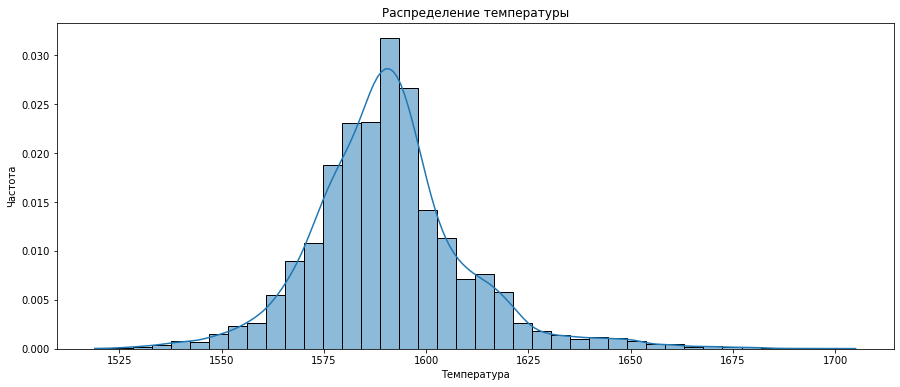

In [63]:
sns_hist_plot(data_temp['temp'], 'Распределение температуры', 'Температура', 40 )

In [64]:
data_temp[data_temp.temp.isna()]

,key,date_test,temp
13927,2500,2019-08-10 14:13:11,NaN
13928,2500,2019-08-10 14:18:12,NaN
13929,2500,2019-08-10 14:25:53,NaN
13930,2500,2019-08-10 14:29:39,NaN
13932,2501,2019-08-10 14:49:15,NaN
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


Температура является целевым признакам, поэтому те объекты, где она отсутствует на последнем этапе нас не интересует

Для этого сгруппируем по температуре и проверим является ли последнее измерение пустым

In [65]:
data_temp.drop(index=data_temp[data_temp.groupby('key')['temp'].transform('last').isna()].index, inplace=True)

In [66]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18065 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   key        18065 non-null  int64         
 1   date_test  18065 non-null  datetime64[ns]
 2   temp       14643 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 MB


**Заключение по предварительному анализу информации по температуре:**

- Были обнаружены пропуски в целевом признаке
- Были отброшены объекты, где эти пропуски имели значение
- Были отброшены объекты, которые не проходили проверку на здравый смысл
- График температур напоминает гауссовское распределение

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>принято. Надо е забыть будет, что у нас объект моделирования - ковш. Если нет целево по ковшу, то кдалем весь ковш из работы.

### Предварительный анализ информации о проволочных материалах (объём)


In [67]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [68]:
data_wire.key.duplicated().sum()

0

In [69]:
data_wire = data_wire.rename(columns=lambda x: re.sub(' ','_',x)).rename(columns=lambda x: x.lower())

In [70]:
data_wire.describe()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


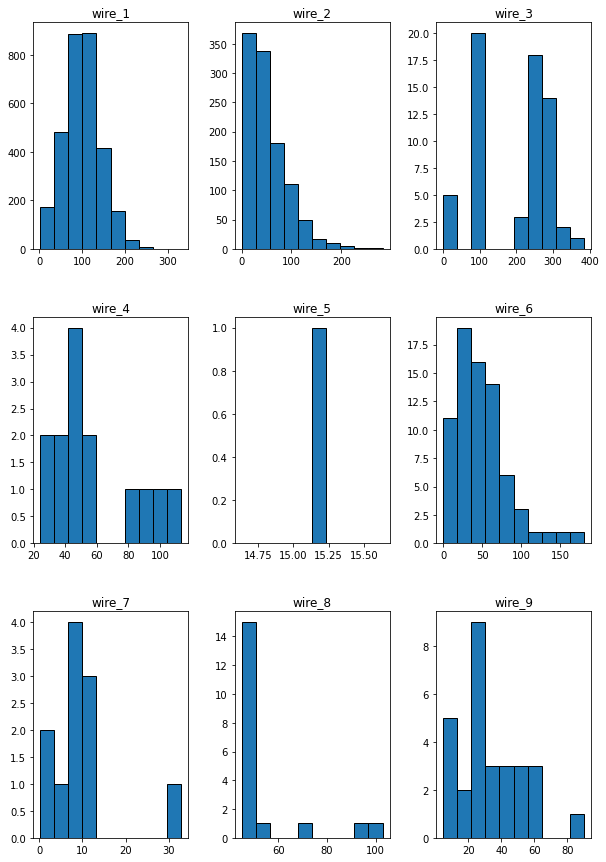

In [71]:
#define format for subplots
fig, axis = plt.subplots(3, 3, figsize=(10,15))

#create histogram for each column in DataFrame
ax = data_wire.drop(columns=['key']).hist(ax=axis, edgecolor='black', grid=False)

**Заключение по предварительному анализу информации о проволочных материалах:**

- Множество пропусков в различных признаках

### Предварительный анализ информации о проволочных материалах (время)


In [72]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [73]:
data_wire_time.key.duplicated().sum()

0

In [74]:
data_wire_time = data_wire_time.rename(columns=lambda x: re.sub(' ','_',x)).rename(columns=lambda x: x.lower())

In [75]:
for i in range(1,10):
    data_wire_time['wire_'+str(i)] =pd.to_datetime(data_wire_time['wire_'+str(i)], format='%Y-%m-%d %H:%M:%S')

In [76]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


**Заключение по предварительному анализу информации о проволочных материалах:**

- Множество пропусков в различных признаках

### Заключение предварительного анализа

- Было обнаружено множество пропусков в различных признаков в различных базах данных
- Были выбрашены аномальные значения
- Данные можно соединить по номеру ковша 'key', но для этого требуется предварительная обработка данных, поскольку каждый ковш может иметь нескольку этапов/записей
- Данные по кавшам могут не совпадать, поэтому лучше будет их соединять 'inner'

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Дмитрий, с первичным анализом - понятно. Есть и аналитика, и графика, и выводы!! Это верно.<br>
<br>

## План работы

- Дальнейшая обработка данных
    + Подготовка даты к 
    + Обработка пропусков
- Подготовка данных для выгрузку в модель
    + Отбор необходимых признаков
    + Объеденинение баз данных
    + Разделение на тренировочную, обучающую выборки
- Выбор моделей
    + Линейная
    + Модель случайного леса
    + CatBoost
- Обучение модели
- Проверка модели на адекватность
- Анализ моделей
- Кроссвалидация моделей и выбор лучшей
- Предсказание модели на тестовой выборке
- Выводы и заключение

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).<br><br>
Если возникнут вопросы - обязательно пиши!!! Да и всегда в чате сможем встретиться. Ну или напиши со следующей итреацией. Постараюсь ответить быстро!<br>
Что ж, тогда вперёд к успешному моделированию)<br>

## Подготовка данных к обучению

### Обработка пропусков

В нескольких таблицах у нас остались еще пропуски, с ними хотелось бы разобраться

In [77]:
# Пропуски в подаче означают, что её не было - то есть это 0.
data_bulk.fillna(0, inplace=True)

In [78]:
data_wire.fillna(0, inplace=True)

С численными пропусками разобрались

Те пропуски в температуре - которые остались - нас не волнуют поскольку для нас имеет значение только финальная температура

Пропуски в дате тоже неважны, поскольку они не должны влиять на обучение.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК

### Агрегация данных

Перед объединением таблиц, некоторые из них нужно агрегировать, чтобы информация о них хранилась только по одному ковшу, а не всех его этапах

Начнём с таблицы по электродам. Для начала, у электродов хотелось иметь отдельно продолжительность самого нагрева в секундах как отдельного параметра

In [79]:
data_arc['time_heat'] = (data_arc['date_end_heat'] - data_arc['date_start_heat']) / pd.Timedelta(seconds=1)

In [80]:
data_arc.head()

,key,date_start_heat,date_end_heat,active_power,reactive_power,time_heat
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


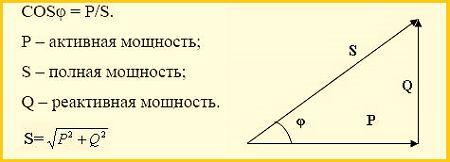

Активная и реактивная мощности складываются векторно

In [81]:
data_arc['full_power'] = (data_arc['active_power'] ** 2 + data_arc['reactive_power'] ** 2) ** 0.5

In [82]:
data_arc.head()

,key,date_start_heat,date_end_heat,active_power,reactive_power,time_heat,full_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0,0.371123
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0,0.902319
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0,0.722536
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0,0.642824
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0,1.079934


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>Новый фактор в деле)

In [83]:
pivot_table_arc = pd.pivot_table(
    data_arc,
    values=['date_start_heat', 'date_end_heat','full_power', 'time_heat','active_power','reactive_power'],
    index='key',
    aggfunc={
        'date_start_heat':'min',
        'date_end_heat':'max',
        'full_power':['mean','last'],
        'time_heat':'mean',
        'active_power':'mean',
        'reactive_power':'mean',
    }
)

Также было решено оставить дату начала первого этапа, а также дату конца последнего этапа, чтобы можно было определить, что 

In [84]:
#pivot_table_arc.columns = ['stage_count', 'date_end_heat', 'date_start_heat', 'mean_full_power', 'mean_time_heat']
pivot_table_arc.columns = ['mean_active_power', 'date_end_heat', 'date_start_heat','last_full_power', 'mean_full_power', 'mean_reactive_power', 'mean_time_heat']

In [85]:
pivot_table_arc.head()

,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat
key,,,,,,,
1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.60
2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.75
3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.00
4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.25
5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.25


С этим разобрались, дальше необходимо объединить информацию в таблице по температурам.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>агрегация по среднему, ок, понял.

In [86]:
data_temp.head()

,key,date_test,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h3> Комментарий Студента 🙇‍♂️</h3>
    
Тут пришлось изменить несколько вещей: во-первых количество этапов было перенесено сюда
</div>

In [87]:
data_temp['stage_count'] = data_temp.groupby('key').date_test.transform('count')

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    
Добавлена изначальная температура
</div>

In [88]:
MELTING_TEMP = 1540

In [89]:
data_temp['initial_temp'] = data_temp.groupby('key').transform('first').temp

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    
Если она пустая, то заполняется температурой плавления
</div>

In [90]:
data_temp['initial_temp'] = data_temp['initial_temp'].fillna(MELTING_TEMP)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    
Если в ковше было только одно измерение, то тогда будет происходиться утечка целевого признака, поэтому изначальная температура изменяется на температуру плавления
</div>

In [91]:
data_temp['initial_temp'] = data_temp.apply(
    lambda row: MELTING_TEMP if row['stage_count'] == 1 else row['initial_temp'],
    axis=1
)

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    
Оставляется только информация по последнему этапу ковша
</div>

In [92]:
data_temp = data_temp.drop_duplicates('key', keep='last')

In [93]:
data_temp.isna().sum()

key               0
date_test         0
temp            738
stage_count       0
initial_temp      0
dtype: int64

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

    
Отбрасываются пустые значения
</div>

In [94]:
data_temp = data_temp.dropna()

In [95]:
data_temp.isna().sum()

key             0
date_test       0
temp            0
stage_count     0
initial_temp    0
dtype: int64

In [96]:
data_temp

,key,date_test,temp,stage_count,initial_temp
5,1,2019-05-03 11:30:38,1613.0,6,1571.0
10,2,2019-05-03 11:55:09,1602.0,5,1581.0
16,3,2019-05-03 12:35:57,1599.0,6,1596.0
21,4,2019-05-03 12:59:47,1625.0,5,1601.0
26,5,2019-05-03 13:36:39,1602.0,5,1576.0
...,...,...,...,...,...
13903,2495,2019-08-10 11:50:47,1591.0,5,1570.0
13910,2496,2019-08-10 12:25:13,1591.0,7,1554.0
13914,2497,2019-08-10 12:53:28,1589.0,4,1571.0
13920,2498,2019-08-10 13:23:31,1594.0,6,1591.0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
И в итоге - ВСЁ ВЕРНО!

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>принято. Хотя перый - можно использовать, как фактор! И такой момент: сейчас отобрались ещё ковши, у кторых только одно измерение было, первое. А посленего у них, можно сказтть и нет. Т.е.  такие ковши нам не нужны в работе. Надо удалять. Может дальше....

### Объединение в одну таблицу

In [97]:
data_bulk['total_bulk'] = data_bulk.iloc[:,1:-1].sum(axis=1)

In [98]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,total_bulk
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,399.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,428.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,391.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,441.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,432.0


In [99]:
data_bulk_merge = data_bulk.merge(data_bulk_time, left_on='key', right_on='key', how='inner', suffixes=['', '_time'])

Хотелось бы проверить на соответствие даты и значений:
- то есть для каждой ненулевой ячейки из таблицы по объему, должна быть соответствующая ей непустая ячейка по дате.

In [100]:
def check_correct_correspond_date(row, row_count, row_name):
    correspondence = True
    for i in range(1, row_count + 1):
        data_value = row[row_name + '_' + str(i)]
        data_time = row[row_name + '_' + str(i) + '_time']
        empty_data_for_both_tables = (data_value == 0) and (str(data_time)=='NaT')
        existing_data_for_both_tables = (data_value > 0) and (str(data_time)!='NaT')
        correspondence = correspondence and (empty_data_for_both_tables or existing_data_for_both_tables)
    return correspondence

In [101]:
data_bulk_merge.key.count()

3129

In [102]:
data_bulk_merge.apply(lambda row: check_correct_correspond_date(row, 15, 'bulk'), axis=1).sum()

3129

Похоже, что проверка была пройдена успешна, проделаем тоже самое для других таблиц

In [103]:
data_wire['total_wire'] = data_wire.iloc[:,1:-1].sum(axis=1)

In [104]:
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,total_wire
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


In [105]:
data_wire_merge = data_wire.merge(data_wire_time, left_on='key', right_on='key', how='inner', suffixes=['', '_time'])

In [106]:
data_wire_merge.key.count()

3081

In [107]:
data_wire_merge.apply(lambda row: check_correct_correspond_date(row, 9, 'wire'), axis=1).sum()

3081

In [108]:
data_wire_merge.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,total_wire,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


Похожа, что здесь проверка тоже была пройдена успешно

In [109]:
data_merge = pivot_table_arc.merge(data_temp, on='key', how='inner')

In [110]:
data_merge.head()

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,stage_count,initial_temp
0,1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.60,2019-05-03 11:30:38,1613.0,6,1571.0
1,2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.75,2019-05-03 11:55:09,1602.0,5,1581.0
2,3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.00,2019-05-03 12:35:57,1599.0,6,1596.0
3,4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.25,2019-05-03 12:59:47,1625.0,5,1601.0
4,5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.25,2019-05-03 13:36:39,1602.0,5,1576.0


In [111]:
data_merge = data_merge.merge(data_gas, on='key', how='inner')

In [112]:
data_merge.head()

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,stage_count,initial_temp,gas
0,1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.60,2019-05-03 11:30:38,1613.0,6,1571.0,29.749986
1,2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.75,2019-05-03 11:55:09,1602.0,5,1581.0,12.555561
2,3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.00,2019-05-03 12:35:57,1599.0,6,1596.0,28.554793
3,4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.25,2019-05-03 12:59:47,1625.0,5,1601.0,18.841219
4,5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.25,2019-05-03 13:36:39,1602.0,5,1576.0,5.413692


In [113]:
data_merge = data_merge.merge(data_bulk_merge, on='key', how='inner')

In [114]:
data_merge.head()

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,...,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time
0,1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.60,2019-05-03 11:30:38,1613.0,...,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.75,2019-05-03 11:55:09,1602.0,...,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.00,2019-05-03 12:35:57,1599.0,...,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.25,2019-05-03 12:59:47,1625.0,...,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.25,2019-05-03 13:36:39,1602.0,...,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


In [115]:
def check_date_start_end(row, row_count, row_name):
    correct = True
    for i in range(1, row_count + 1):
        data_time = row[row_name + '_' + str(i) + '_time']
        if str(data_time) != 'NaT':
            correct = correct and (data_time >= row['date_start_heat']) and (data_time <= row['date_test'])
    return correct

In [116]:
data_merge.key.count()

2400

In [117]:
data_merge.apply(lambda row: check_date_start_end(row, 15, 'bulk'), axis=1).sum()

2400

Пожоже, что и здесь проблем нет с этим. Поэтому можно продолжить соединять

In [118]:
data_merge = data_merge.merge(data_wire_merge, on='key', how='inner')

In [119]:
data_merge.head()

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,...,total_wire,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.60,2019-05-03 11:30:38,1613.0,...,60.059998,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.75,2019-05-03 11:55:09,1602.0,...,96.052315,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.00,2019-05-03 12:35:57,1599.0,...,91.160157,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.25,2019-05-03 12:59:47,1625.0,...,89.063515,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.25,2019-05-03 13:36:39,1602.0,...,98.352796,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [120]:
data_merge.key.count()

2324

In [121]:
data_merge.apply(lambda row: check_date_start_end(row, 9, 'wire'), axis=1).sum()

2324

In [122]:
data_merge

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,...,total_wire,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
0,1,0.607346,2019-05-03 11:28:37,2019-05-03 11:02:14,1.079934,0.743747,0.428564,219.600000,2019-05-03 11:30:38,1613.0,...,60.059998,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,0.534852,2019-05-03 11:53:18,2019-05-03 11:34:14,0.955315,0.647087,0.363339,202.750000,2019-05-03 11:55:09,1602.0,...,96.052315,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,0.812728,2019-05-03 12:32:19,2019-05-03 12:06:54,0.502111,1.003845,0.587491,131.000000,2019-05-03 12:35:57,1599.0,...,91.160157,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,0.676622,2019-05-03 12:57:50,2019-05-03 12:39:37,1.084803,0.850010,0.514248,185.250000,2019-05-03 12:59:47,1625.0,...,89.063515,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,0.563238,2019-05-03 13:33:55,2019-05-03 13:11:13,1.110873,0.704245,0.421998,217.250000,2019-05-03 13:36:39,1602.0,...,98.352796,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2495,0.792033,2019-08-10 11:48:05,2019-08-10 11:27:57,1.086811,0.967180,0.552734,180.750000,2019-08-10 11:50:47,1591.0,...,89.150879,2019-08-10 11:31:40,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2320,2496,0.695820,2019-08-10 12:23:07,2019-08-10 11:56:58,1.547188,0.845053,0.478672,156.666667,2019-08-10 12:25:13,1591.0,...,114.179527,2019-08-10 11:59:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2321,2497,1.201746,2019-08-10 12:51:20,2019-08-10 12:37:36,1.560949,1.453639,0.817364,189.666667,2019-08-10 12:53:28,1589.0,...,103.134723,2019-08-10 12:46:10,2019-08-10 12:40:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2322,2498,0.640462,2019-08-10 13:20:59,2019-08-10 12:58:21,0.625538,0.781983,0.447964,150.000000,2019-08-10 13:23:31,1594.0,...,118.110717,2019-08-10 13:02:54,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>В целом - кажется ОК.  Иннер тут то, что надо. НО есть такой момент: у нас ковши наблюдаются, в которых нет целвой, но есть первая температура. А объект моделирования у нас - ковш. И если нет целевой - надо удалять весь ковш. Сейчас они всё ещё в деле))). Наприм ковш номер 3000 - целевой нет. Значить надо удалить. А он всё равно в таблице остался. Посомтри, пожалуйста. Это на стадии, когда  первую и последнюю температуру надо отбирать в таблице темп!!!!</p>

In [122]:
data_merge.query('key == 3000')

,key,mean_active_power,date_end_heat,date_start_heat,last_full_power,mean_full_power,mean_reactive_power,mean_time_heat,date_test,temp,...,total_wire,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h3> Комментарий Студента 🙇‍♂️</h3>
    
Было исправленно выше
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ ТИМЛИДА 3</b><br>ОТЛИЧНО!!!!

Здесь тоже успешно прошло проверку

### Разделение на выборки

In [123]:
feature_columns = ['stage_count', 'mean_full_power','last_full_power', 'total_bulk', 'total_wire', 'gas', 'mean_time_heat', 'initial_temp']

In [124]:
def split_data(data, column_name, columns):
    # 1st we separate data for features and target data
    features = data.loc[:,columns]
    target = data[column_name]
    # 2rd we separate data for testing and training samples
    features_train, features_test, target_train, target_test =\
    train_test_split(
            features,
            target,
            train_size=0.75,
            random_state=RANDOM_STATE
    )
    return features_train, features_test, target_train, target_test

In [125]:
features_train, features_test, target_train, target_test = split_data(data_merge, 'temp', feature_columns)

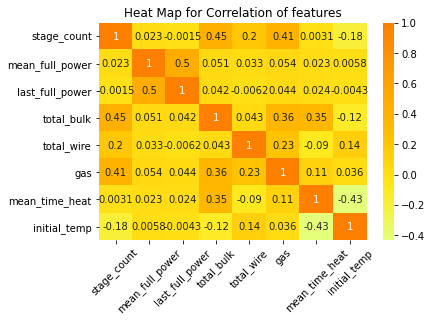

In [126]:
corr = features_train.corr()
ax = sns.heatmap(corr, cmap = 'Wistia', annot= True)
ax.title.set_text('Heat Map for Correlation of features')
plt.xticks(rotation=45)
plt.show()

## Обучение моделей

In [127]:
linear_model =  Pipeline(steps=[
            ("scaler", StandardScaler()),
            ("linear", LinearRegression())
        ])

In [128]:
cross_val_score(linear_model, features_train, target_train, cv = 4, scoring='neg_mean_absolute_error')

array([-6.99133887, -6.86909533, -6.88332385, -6.97705998])

In [129]:
def find_best_forest_model(features_train, target_train):
    par_grid_forest = {
        'forest__min_samples_split': range(2,12, 3),
        'forest__min_samples_leaf': range(1,10, 3),
        'forest__max_depth' : range(3,11, 2),
        'forest__n_estimators': range(8, 60, 10)
    }
    model = Pipeline(steps=[
            ("scaler", StandardScaler()),
            ("forest", RandomForestRegressor(random_state=RANDOM_STATE))
        ])
    grid_search = GridSearchCV(
        model,
        par_grid_forest,
        scoring='neg_mean_absolute_error',
        cv=4
    ).fit(features_train, target_train)
    print('Best parametrs', grid_search.best_params_)
    print('Score', grid_search.best_score_ )
    return grid_search.best_estimator_, grid_search.best_score_

In [130]:
forest_model, forest_score = find_best_forest_model(features_train, target_train)

Best parametrs {'forest__max_depth': 9, 'forest__min_samples_leaf': 4, 'forest__min_samples_split': 11, 'forest__n_estimators': 38}
Score -6.813456829139135


In [131]:
def find_best_lgb_model(features_train, target_train):
    param_grid = {
        'num_leaves': range(5,150,20),
        'boosting_type': ['gbdt'],
        'metric': ['mae'],
        'colsample_bytree': [0.9],
        'objective': ['rmse'],
        'subsample': [0.8],
        'learning_rate': [0.01],
        'subsample_freq': [5],
        'verbose': [-1],
        'max_depth':range(3, 7),
        'n_estimators': range(8, 60, 10),
        'min_child_samples': range(2,12, 3)
        }

    lgb_estimator = lgb.LGBMRegressor(random_state=RANDOM_STATE)

    gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=4, scoring='neg_mean_absolute_error')
    lgb_model = gsearch.fit(features_train, target_train)
    return lgb_model

In [178]:
def find_best_cat_model(features_train, target_train):
    model_ = CatBoostRegressor(eval_metric='MAE', random_seed=RANDOM_STATE)
    grid = {'learning_rate' : np.arange(0.01, 0.3, 0.05),
            'depth' : [4],
            'iterations' : [200,300,350,400]
           }

    grid_search_result = model_.grid_search(grid, 
                                       X=features_train, 
                                       y=target_train,
                                       cv=6
                                      )
    return model_

In [179]:
cat_model = find_best_cat_model(features_train, target_train)

0:	learn: 1578.3075525	test: 1576.8928100	best: 1576.8928100 (0)	total: 859us	remaining: 171ms
1:	learn: 1562.7888104	test: 1561.3654409	best: 1561.3654409 (1)	total: 1.94ms	remaining: 192ms
2:	learn: 1547.5267477	test: 1546.0847818	best: 1546.0847818 (2)	total: 2.73ms	remaining: 179ms
3:	learn: 1532.4136747	test: 1530.9914977	best: 1530.9914977 (3)	total: 3.46ms	remaining: 170ms
4:	learn: 1517.3469283	test: 1515.9869749	best: 1515.9869749 (4)	total: 4.17ms	remaining: 163ms
5:	learn: 1502.5349169	test: 1501.1664223	best: 1501.1664223 (5)	total: 4.84ms	remaining: 156ms
6:	learn: 1487.8142748	test: 1486.4439814	best: 1486.4439814 (6)	total: 5.55ms	remaining: 153ms
7:	learn: 1473.3814343	test: 1472.0326916	best: 1472.0326916 (7)	total: 6.25ms	remaining: 150ms
8:	learn: 1458.9247444	test: 1457.6399325	best: 1457.6399325 (8)	total: 6.94ms	remaining: 147ms
9:	learn: 1444.6336135	test: 1443.3684159	best: 1443.3684159 (9)	total: 7.66ms	remaining: 146ms
10:	learn: 1430.3947136	test: 1429.091229

In [180]:
cat_model.get_params()

{'loss_function': 'RMSE',
 'random_seed': 2062023,
 'eval_metric': 'MAE',
 'depth': 4,
 'iterations': 200,
 'learning_rate': 0.21}

In [181]:
cat_model.get_best_score()

{'learn': {'MAE': 4.553455247568067, 'RMSE': 5.850699068908497}}

**Критерий - MAE <= 6.8**

CatBoostRegressor успешно прошла проверку

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p> нет-нет, такой подход не совсем подходит! Модль конечно же стает сейча суперной!!!!!!!!! Но с практической стороны - не применимая модель! Теперь для того, чтобы предсказать работу нового ковша нам надо сначала предсказать предпоследню температуру. Т.е. ещё одну модель делать. При этоу номр итерации - не стабилен.... В общем - НЕЛЬЗЯ реаизовать такой подход.. Вотпервую температуру - начальное состояние объекта моедлирования - это можно и нужо!

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h3> Комментарий Студента 🙇‍♂️</h3>
    
Было исправленно выше
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ ТИМЛИДА 3</b><br>хорошо.

## Проверка модели

**Лучший результат показала модель леса**

Проверим какой результат она в итоге предскажет

In [182]:
mean_absolute_error(cat_model.predict(features_test), target_test)

6.790874860016488

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>только. только вписались)

MAE - 6.79

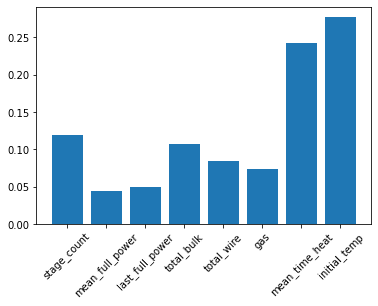

In [183]:
plt.bar(feature_columns, forest_model[1].feature_importances_ )
plt.xticks(rotation=45)
plt.show()

In [184]:
forest_model[1].feature_importances_ 

array([0.120009  , 0.04487191, 0.05000981, 0.10719936, 0.08466757,
       0.07414591, 0.24205894, 0.2770375 ])

### Проверка на адекватность

In [185]:
dummy_model = DummyRegressor(strategy='mean')

In [186]:
cross_val_score(dummy_model, features_train, target_train, cv = 4, scoring='neg_mean_absolute_error' )

array([-7.97094509, -8.14685041, -7.49512505, -8.57480404])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
ОК, Дмитрий, скажу, что ещё один уверненный шаг к финалу этой истории!<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
  
При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.9).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее) Этот момент сделан хорошо. Есть ещё один инструмент, который помгает в нашей работе.<br>
<font color='red'>      
Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br>
    
Также оставил несколько важных кмментариев по предобработке и формированию фаткоров - посмотри, пожалуйста.<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Осталось не много)<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h3> Комментарий Студента 🙇‍♂️</h3>
    
Средняя мощность нагрева показала худший результат важности, попробуем его убрать и посмотреть как измениться результат
</div>

In [191]:
feature_columns = ['stage_count','last_full_power', 'total_bulk', 'total_wire', 'gas', 'mean_time_heat', 'initial_temp']

In [192]:
features_train, features_test, target_train, target_test = split_data(data_merge, 'temp', feature_columns)

In [193]:
cat_model = find_best_cat_model(features_train, target_train)

0:	learn: 1578.2540141	test: 1576.8388762	best: 1576.8388762 (0)	total: 888us	remaining: 177ms
1:	learn: 1562.7773445	test: 1561.3063875	best: 1561.3063875 (1)	total: 1.84ms	remaining: 182ms
2:	learn: 1547.4329106	test: 1545.9703860	best: 1545.9703860 (2)	total: 2.51ms	remaining: 165ms
3:	learn: 1532.1982085	test: 1530.7902988	best: 1530.7902988 (3)	total: 3.18ms	remaining: 156ms
4:	learn: 1517.1257709	test: 1515.7513247	best: 1515.7513247 (4)	total: 3.89ms	remaining: 152ms
5:	learn: 1502.3323256	test: 1500.9559716	best: 1500.9559716 (5)	total: 4.59ms	remaining: 148ms
6:	learn: 1487.6313613	test: 1486.2392367	best: 1486.2392367 (6)	total: 5.38ms	remaining: 148ms
7:	learn: 1473.1213294	test: 1471.7058322	best: 1471.7058322 (7)	total: 6ms	remaining: 144ms
8:	learn: 1458.7810586	test: 1457.3494845	best: 1457.3494845 (8)	total: 6.68ms	remaining: 142ms
9:	learn: 1444.4688492	test: 1442.9854785	best: 1442.9854785 (9)	total: 7.61ms	remaining: 145ms
10:	learn: 1430.3771470	test: 1428.8921127	b

In [194]:
mean_absolute_error(cat_model.predict(features_test), target_test)

6.944067711176731

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Значение достаточно сильно ухудшилось
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
ОК, Дмитрий, теперь можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> Увидел твои комментари/коорректировки. Принято. Зашли в самый край)) Чтобы улучшить метрику, можно поиспользовать ещё фактор длительность нагрева ковша, длительность работы элетродов. (сейчас используются средние величины). Но это по желанию).<br>
 
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
Тогда впереди только отчёт. Что для него важно - оставлял в презентации. <br>
БУДУ ЖДАТЬ! <br>

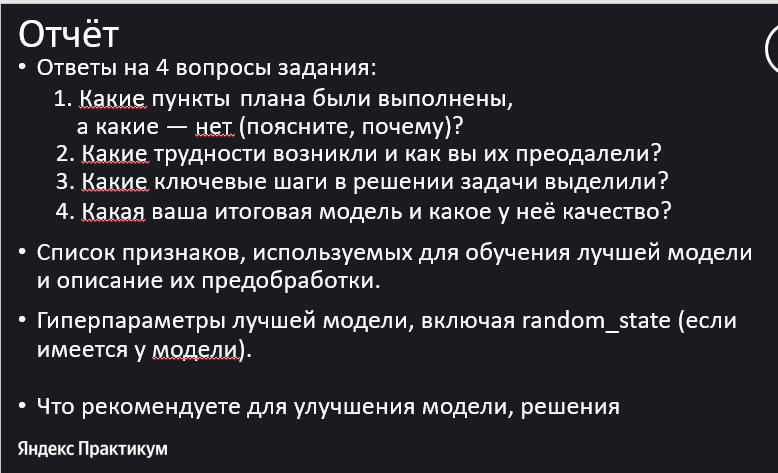